<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/OpenCV_019_%EC%96%BC%EA%B5%B4%EA%B2%80%EC%B6%9C(Dlib).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/00_title.png"></center>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[19차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ Dlib 라이브러리를 사용할 수 있는 환경을 구축할 수 있다<br><br>
○ Dlib 라이브러리를 이용하여 얼굴을 검출할 수 있다 <br><br>
○ Dlib 라이브러리의 랜드마크를 이해하고 사용할 수 있다 </font></td></tr>   
</table>        

# 얼굴 검출 (Dlib 라이브러리 활용)

## Dlib 개요

- dlib는 얼굴영상에서 68개의 얼굴의 랜드마크 검출
- dlib 파일 다운로드 : https://pypi.org/project/dlib/
- 학습 데이터 모델 : http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/19_dlib_randmark.png" width=50%></center>

- Visual Studiio 다운로드 : https://visualstudio.microsoft.com/ko/downloads/
- 실행 후에 C++를 이용한 데스크톱 개발를 선택하고 오른쪽의 선택된 옵션 (옵션을 보면, Windows용 C++ CMake 도구 선택)을 install 버튼을 클릭하여 설치

In [1]:
# 멀티플랫폼으로 사용할 수 있는 Make의 빌드관리시스템을 만들기 위한 오픈소스 프로젝트
!pip install cmake

In [2]:
!pip install dlib

In [3]:
# OpenCV가 제공하는 기능 중에 복잡하고 사용성이 떨어지는 부분을 보완 (비디오 스트림 파일 처리 등)
!pip install imutils

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/사물지능A

/content/drive/MyDrive/Colab Notebooks/사물지능A


## 랜드마크 검출

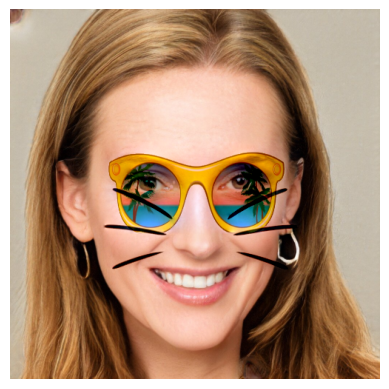

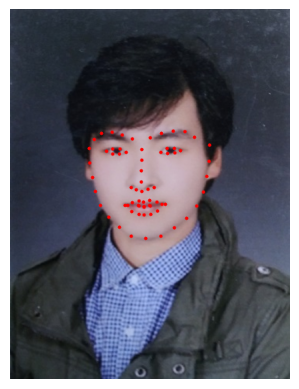

In [22]:
# 실습
import cv2
import imutils
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt
import dlib

# 모델 가져오기
detector = dlib.get_frontal_face_detector()
pred = dlib.shape_predictor("./images/shape_predictor_68_face_landmarks.dat")

img = cv2.imread("./images/face2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("./images/me.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 스티커 이미지
sticker = cv2.imread("./images/cat-whisker2.png")
sticker = cv2.cvtColor(sticker, cv2.COLOR_BGR2RGB)

sticker2 = cv2.imread("./images/glass.png")
sticker2 = cv2.cvtColor(sticker2, cv2.COLOR_BGR2RGB)

# 이미지 크기 변경
img = imutils.resize(img, width=500)
img2 = imutils.resize(img2, width=500)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

# 얼굴 영역 추출
rects = detector(img_gray, 1)
rects2 = detector(img_gray2, 1)

# 68개 랜드마크 추출
for rect in rects :
  shape = pred(img_gray, rect)
  shape = face_utils.shape_to_np(shape)

  # # 검출된 랜드마크 출력
  # for (x, y) in shape :
  #   cv2.circle(img, (x,y), 3, (255, 0, 0), -1)

  # 얼굴 영역 좌표
  (x, y, w, h) = face_utils.rect_to_bb(rect)

  # 스티커 이미지를 얼굴 이미지의 크기에 맞게 변경
  sticker = cv2.resize(sticker, (w, h//2))
  sticker2 = cv2.resize(sticker2, (w, h//2))

  # 스티커에서 이미지를 마스킹
  mask = 255 * np.ones(sticker.shape, sticker.dtype)
  mask2 = 255 * np.ones(sticker2.shape, sticker2.dtype)

  # 기준이 되는 랜드마크 번호를 설정
  center = shape[29]
  center2 = shape[27]

  # 스티커 붙이기
  img = cv2.seamlessClone(sticker, img, mask, center, cv2.MIXED_CLONE)
  img = cv2.seamlessClone(sticker2, img, mask2, center2, cv2.MIXED_CLONE)

for rect in rects2 :
  shape = pred(img_gray2, rect)
  shape = face_utils.shape_to_np(shape)

  # 검출된 랜드마크 출력
  for (x, y) in shape :
    cv2.circle(img2, (x,y), 3, (255, 0, 0), -1)

plt.imshow(img)
plt.axis("off")
plt.show()

plt.imshow(img2)
plt.axis("off")
plt.show()

## 얼굴에 스티커 붙이기

- <font color=red>output = cv2.seamlessClone(src, dst, mask, center, flags)</font>
  - src : 배경 이미지(dst)에 붙일 이미지
  - dst : 배경 이미지
  - mask : src를 붙일 dst의 위치 마스트, src의 크기여야 함
  - center : src가 위치할 dst의 중심 위치
  - flags : 동작 방법 (NORMAL_CLONE, MIXED_CLONE)

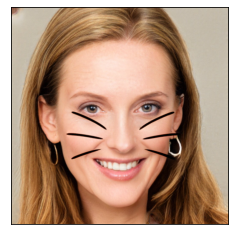

In [ ]:
# 실습

## ROI 영역 표시하기 (눈썹, 눈, 코, 입)

In [ ]:
def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
    overlay = image.copy()
    output = image.copy()

    # 색상 코드
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
                  (168, 100, 168), (158, 163, 32), (163, 38, 32),
                  (180, 42, 220), (0, 0, 255)]

    # 랜드마크 영역을 하나씩 가져옴
    for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
        # 랜드마크 좌표 (x, y)를 반환
        (j, k) = FACIAL_LANDMARKS_IDXS[name]
        pts = shape[j:k]

        # 턱선을 표시하는 경우
        if name == "jaw":
            #pass
            # 턱선 좌표를 가져와서 열린 곡선으로 턱선을 그림
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)
        else:
            # 랜드마크 영역의 윤곽선을 추출
            hull = cv2.convexHull(pts)
            # 랜드마크 영역을 윤곽선으로 그림
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)

    # 투명도를 적용하여 랜드마크 영역을 색칠함
    # overlay * alpha + output * (1 - alpha) + 0 * output
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    return output

visualize_facial_landmarks() 함수를 변경하고자 하는 경우에 활용하기 위한 코드 (필요시 코드 배포)

In [ ]:
# 표시하고자 하는 랜드마크만 따로 정의해서 사용
from collections import OrderedDict

# 68개의 랜드마크 번호
FACIAL_LANDMARKS_68_IDXS = OrderedDict([
    ("mouth", (48, 68)),            # 입
    ("inner_mouth", (60, 68)),      # 안쪽 입
    ("right_eyebrow", (17, 22)),    # 눈썹
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),        # 눈
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),             # 코
    ("jaw", (0, 17))                # 턱
])

FACIAL_LANDMARKS_EYE_IDXS = OrderedDict([
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48))
])

FACIAL_LANDMARKS_IDXS = FACIAL_LANDMARKS_68_IDXS

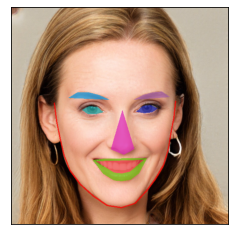

In [ ]:
# 실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[19차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ dlib는 얼굴영상에서 68개의 얼굴의 랜드마크 검출<br><br>
○ <font color=red>output = cv2.seamlessClone(src, dst, mask, center, flags)</font> : 배경 이미지에 다른 이미지를 붙임
        </font></td></tr>   
</table>